# Boston dataset 

* The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes.


<img src="https://cdn-images-1.medium.com/max/2000/1*bvXWvdDMk8FTS1WWd9_JEg.jpeg">

In [1]:
# Using sklearn inbuilt dataset boston
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDRegressor

In [2]:
!pip install --upgrade "ipython[all]"

Requirement already up-to-date: ipython[all] in /opt/conda/envs/py3.6/lib/python3.6/site-packages (6.4.0)
Requirement not upgraded as not directly required: pickleshare in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (0.7.4)
Requirement not upgraded as not directly required: pexpect; sys_platform != "win32" in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (4.3.0)
Requirement not upgraded as not directly required: pygments in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (2.2.0)
Requirement not upgraded as not directly required: traitlets>=4.2 in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (4.3.2)
Requirement not upgraded as not directly required: simplegeneric>0.8 in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython[all]) (0.8.1)
Requirement not upgraded as not directly required: prompt-toolkit<2.0.0,>=1.0.15 in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from ipython

Requirement not upgraded as not directly required: pyparsing>=2.0.2 in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from packaging->Sphinx>=1.3; extra == "all"->ipython[all]) (2.2.0)
Requirement not upgraded as not directly required: pytz>=0a in /opt/conda/envs/py3.6/lib/python3.6/site-packages (from babel!=2.0,>=1.3->Sphinx>=1.3; extra == "all"->ipython[all]) (2018.4)


In [3]:
boston = load_boston() # loading the data

In [4]:
print(boston.DESCR) # Describtion of the data

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
print(boston.data.shape)

(506, 13)


In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [8]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1) # axis = 1 means all columns of the Price
Y = bos['PRICE']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


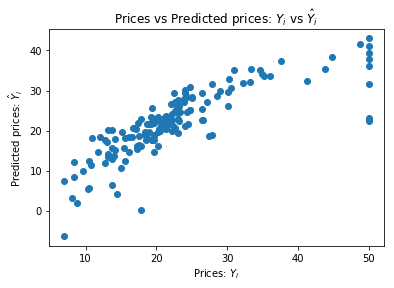

R^2 score 0.677104554504


In [10]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Prices: $Y_i$')
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()
print('R^2 score', r2_score(y_test, y_pred))

# SGD Linear Regression Model

In [11]:
class SGDRegressors(BaseEstimator):
    """
    Custom stochastic gradient descent
    algorithm for linear regression
    """
    def __init__(self,max_iter=1000, alpha=0.0001, tol=0.0001, batch_size=50):
        self.max_iter = max_iter
        self.alpha = alpha
        self.tol = tol
        self.batch_size = batch_size
        
        self.coef_ = None
        self.intercept_ = None
        
        # for debugging
        self.total_errors = []
        self.sample_errors = []
        self.coef_diffs = []
        self.intercept_diffs = []
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        rows, features = X.shape
        
        # Initialize coef and intercept
        self.coef_ = np.zeros(features)
        self.intercept_ = 0.0
        
        self.optimize(X, y)
        return self
    
    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_
    
    def sample(self, X, y):
        """
        returns a random sample of rows
        """
        idx = np.random.randint(X.shape[0], size=self.batch_size)
        return X[idx,:], y[idx]
    
    def compute_rms_error(self, X, y):
        return np.sqrt(np.sum((y - self.predict(X)) ** 2) / len(X))
    
    def optimize(self, X, y):
        """
        Optimizes the coef_ and intercept
        for lower squared errors
        """
        for i in range(1, self.max_iter + 1):
            
            # Save the error on whole dataset
            self.total_errors.append(self.compute_rms_error(X, y))
            
            # Save previous
            prev_coef = self.coef_
            prev_intercept = self.intercept_
            
            # Take a sample
            X_sample, y_sample = self.sample(X, y)
            
            # Save sample error
            self.sample_errors.append(self.compute_rms_error(X_sample, y_sample))
            
            pred = self.predict(X_sample)
            diff = y_sample - pred
            
            
            # compute gradients
            coef_grad = -2 * np.dot(X_sample.T, diff)
            intercept_grad = -2 * np.sum(diff)
            
            # update coef_ and intercept
            self.coef_ = self.coef_ - (self.alpha / i) * coef_grad
            self.intercept_ = self.intercept_ - (self.alpha / i) * intercept_grad
            
            # Compute diff of intercept and coef
            coef_diff = np.linalg.norm(self.coef_ - prev_coef)
            intercept_diff = self.intercept_ - prev_intercept
            
            # Save the difference
            self.coef_diffs.append(coef_diff)
            self.intercept_diffs.append(intercept_diff)
            
            # if diff is less than tolerence then terminate
            if coef_diff < self.tol and intercept_diff < self.tol:
                # Save final errors
                self.total_errors.append(self.compute_rms_error(X, y))
                self.sample_errors.append(self.compute_rms_error(X_sample, y_sample))
                break

In [12]:
model = SGDRegressors(alpha=0.005)
scaler = StandardScaler() # The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
X_scaled = scaler.fit_transform(X_train)
model.fit(X_scaled, y_train)

SGDRegressors(alpha=0.005, batch_size=50, max_iter=1000, tol=0.0001)

In [13]:
model.coef_diffs[0]

7.4690264459532791

In [14]:
model.total_errors[0] # initial error

24.261493868798819

In [15]:
model.total_errors[-1] # final error

4.5258242141443619

In [16]:
len(model.total_errors)

1000

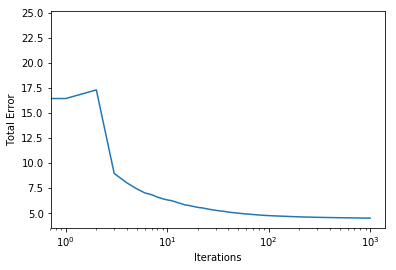

In [17]:
plt.plot(model.total_errors)
plt.xlabel('Iterations')
plt.ylabel('Total Error')
plt.xscale('log')

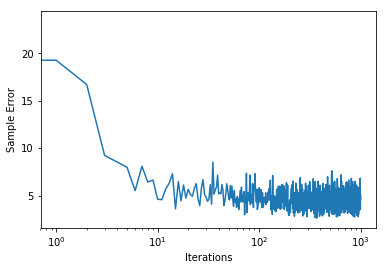

In [18]:
plt.plot(model.sample_errors)
plt.xlabel('Iterations')
plt.ylabel('Sample Error')
plt.xscale('log')

* AS expected with Stochastic gradient descent, the error fluctuates at the minimum error and with bigger batch size we migh get less fluctuations

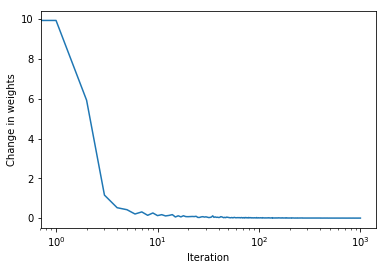

In [19]:
plt.plot(model.coef_diffs)
plt.xlabel('Iteration')
plt.ylabel('Change in weights')
plt.xscale('log')

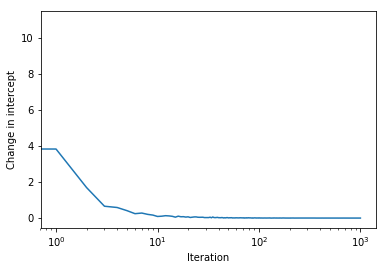

In [20]:
plt.plot(model.intercept_diffs)
plt.xlabel('Iteration')
plt.ylabel('Change in intercept')
plt.xscale('log')

## Evaluation on test set of  modified SGD

R^2 score 0.660411376265


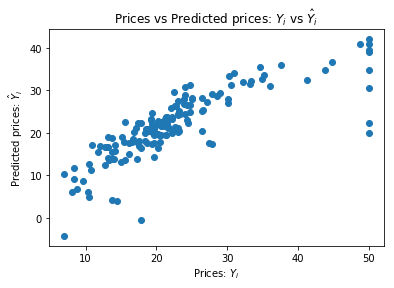

In [21]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
print('R^2 score', r2_score(y_test, y_pred))
plt.show()

In [22]:
# Built in sklearn SGD
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(alpha=0.005)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
model.fit(X_scaled, y_train)

/opt/conda/envs/py3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.005, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

## Evaluation on sklearn inbuilt SGD

R^2 score 0.647524062748


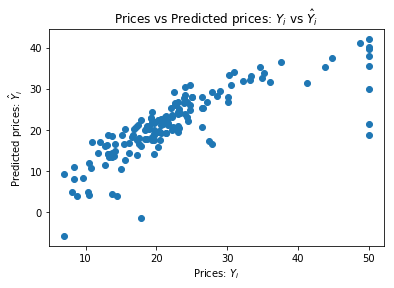

In [23]:
X_test_scaledx = scaler.transform(X_test)
y_predi = model.predict(X_test_scaledx)

plt.scatter(y_test, y_predi)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
print('R^2 score', r2_score(y_test, y_predi))
plt.show()

## SKlearn SGD VS Modiefied SGD

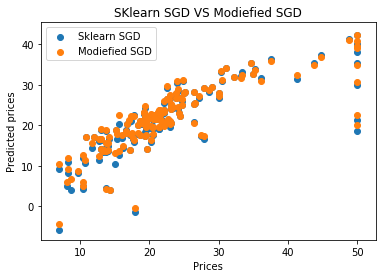

In [24]:
plt.scatter(y_test, y_predi, label='Sklearn SGD')
plt.scatter(y_test, y_pred, label='Modiefied SGD')
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.title('SKlearn SGD VS Modiefied SGD')
plt.legend(loc='best')
plt.show()

# Comparison on accuracy

(0.6, 0.7)

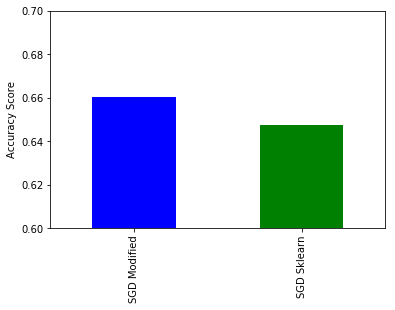

In [26]:
Sgd_accuracy = {
    'SGD Sklearn': 0.6475,
    'SGD Modified': 0.6604
}

pd.Series(Sgd_accuracy).plot(kind='bar', color='bg')
plt.ylabel('Accuracy Score')
plt.ylim(0.60, .70)

# Conclusion:-
* From the above bar graph we can say that the SGD modified algorithm has the slightly high R^2 score than the skleanr's SGD model.